<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/linearTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
%matplotlib inline
import torch
import random
from matplotlib import pyplot as plt
from IPython import display
import numpy as np

In [43]:
true_w = [2,-3.4]
true_b = 4.2
num_inputs = 2
num_examples = 1000
features = torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)),dtype=torch.float)
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [44]:
import torch.utils.data as Data
batch_size=10
dataset = Data.TensorDataset(features,labels)
data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)

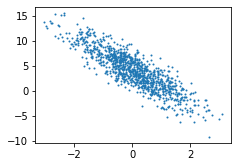

In [45]:
def set_svg_figure():
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

定义模型

In [46]:
import torch.nn as nn
class LinearNet(nn.Module):
  def __init__(self,n_features):
    super(LinearNet,self).__init__()
    self.linear = nn.Linear(n_features,1)
  def forward(self,x):
    y = self.linear(x)
    return y
net = LinearNet(num_inputs)

In [47]:
from torch.nn.modules.container import Sequential
net = Sequential(
    nn.Linear(num_inputs,1)
)

初始化模型参数

In [48]:
from torch.nn import init
init.normal_(net[0].weight,mean=0,std=0.01)
init.constant_(net[0].bias,val=0)

Parameter containing:
tensor([0.], requires_grad=True)

定义损失函数

In [49]:
loss = nn.MSELoss()

定义优化算法

In [50]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr=0.03)

训练模型

In [51]:
num_epoch =3
for epoch in range(1,num_epoch+1):
  for X,y in data_iter:
    output = net(X)
    l = loss(output,y.view(-1,1))
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
  print('epoch %d,loss %f' % (epoch+1,l.item()))

epoch 2,loss 0.000314
epoch 3,loss 0.000058
epoch 4,loss 0.000112


In [52]:
print(true_w,'\n',net[0].weight)
print(true_b,'\n',net[0].bias)

[2, -3.4] 
 Parameter containing:
tensor([[ 1.9995, -3.4006]], requires_grad=True)
4.2 
 Parameter containing:
tensor([4.1994], requires_grad=True)
